# Import Assignments From a CSV File¶
In this example, a CSV file containing the locations of potholes will be imported into a Workforce Project as new assignments.

### Import ArcGIS API for Python
Import the `arcgis` library and some modules within it.

In [1]:
import pandas as pd
from arcgis.gis import GIS
from arcgis.apps import workforce
from arcgis.geocoding import geocode


### Connect to Organization And Get The Project
Let's connect to ArcGIS Online and find the new Project to add assignments to.

In [2]:
gis = GIS("https://arcgis.com", "workforce_scripts")
item = gis.content.get("29f2f056e5e04ba383e59737b3f8b340")
project = workforce.Project(item)

Enter password: ········



### Load the CSV File¶
Let's use the pandas library to read the CSV file and display the potholes.

In [3]:
df = pd.read_csv("potholes.csv")
df

,Address,City,State,Description,Priority,Work Order ID
0,State St & W G St,San Diego,CA,Fill in the pothole on State Street near the i...,2,p0000001
1,15th St & E St,San Diego,CA,Fill in the pothole in the middle of the inter...,2,p0000002
2,3119 Ocean View Blvd,San Diego,CA,Fill in the pothole near the curb,2,p0000003
3,2901 B St,San Diego,CA,Fill in the pothole on the south side,3,p0000004
4,598 Ash St,San Diego,CA,Fill in the pothole near Domino's,2,p0000005
5,841 N Harbor,San Diego,CA,Fill in the pothole near the curb,2,p0000006


### Create An Assignment For Each Row
For each assignment, First geocode the address to get the x,y location in (WGS84 Web Mercator) of the assignment. Then supply additional attributes.

Finally use the batch_add method to add multiple assignments at once (this is faster than using the add method since validation is performed once for all assignments).

In [4]:
assignments = []
for index, row in df.iterrows():
    geometry = geocode(f"{row['Address']} {row['City']} {row['State']}", out_sr=3857)[0]["location"]
    assignments.append(
        workforce.Assignment(
            project,
            geometry=geometry,
            location=row["Address"],
            description=row["Description"],
            priority=int(row["Priority"]),
            work_order_id=row["Work Order ID"],
            assignment_type="Fill in Pothole",
            status="unassigned"
        )
    )
project.assignments.batch_add(assignments)

[<Assignment 31>,
 <Assignment 32>,
 <Assignment 33>,
 <Assignment 34>,
 <Assignment 35>,
 <Assignment 36>]


### Verify the assignments on the map
Let's verify that the assignments were created.


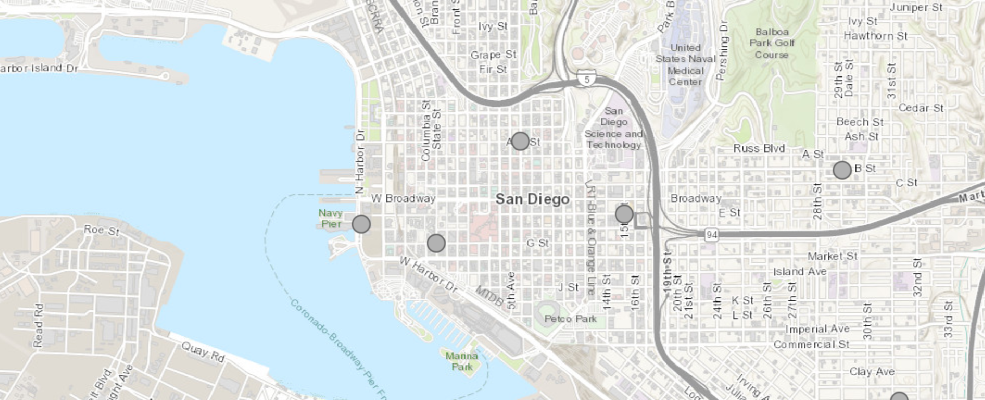

In [6]:
webmap = gis.map("San Diego", zoomlevel=14)
webmap.add_layer(project.assignments_layer)
webmap